# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

Climate change has created a drastic negative impact on the Earth and is becoming an issue that will affect us as young people and future generations[1]. Therefore, we are curious to study what groups or demographics of people are reducing climate change in the form of recycling. Overall, we are looking to study what are the characteristics of people who are most likely to reduce climate change by recycling.

# Names

- Athena Hao
- Allison Ngo
- Karina Sanchez
- Lingye Zhuang

<a id='research_question'></a>
# Research Question

**Do communities with higher financial level tend to have higher curbside recycle rates in Buffalo, NY?**

<a id='background'></a>

## Background & Prior Work

Recycling is an easy and effective way for normal people to help combat climate change by recycling products so that the materials from those products can be reused in order to reduce excessive/unnecessary waste. This research is important because it can set a foundation for future research to find solutions that will encourage more curbside recycling in communities.In our project we want to research on the factors that influence people’s recycling habits. These factors include age, income, and ethnicity. We can determine what groups of communities recycle the least and target those communities for change.

References (include links):
- 1)https://www.wwf.org.au/news/blogs/plastic-waste-and-climate-change-whats-the-connection#gs.ecsekh 

- 2)https://www.colorado.edu/ecenter/2021/02/25/climate-impact-single-use-plastics 

# Hypothesis


For this research we are going to conduct a null hypothesis with 5% significance level.

Our null hypothesis states that there is no correlation between curbside recycling rates and financial factors of each neighborhood (such as income rates, poverty rates, and unemployment rates) in Buffalo, NY.

Our alternative hypothesis states that, among neighborhoods in Buffalo, NY, there is a correlation between curbside recycling rates and financial factors, specifically wealthier neighborhoods have higher curbside recycling rates.

# Dataset(s)

**Dataset Name:** Neighborhood and Curbside Recycling Rates\
**Link to the dataset:** https://data.world/buffalony/ug79-xatx/workspace/file?filename=neighborhood-curbside-recycling-rates-1.csv \
**Number of observations:** 624\
**Description:** This dataset analyzes the curbside recycling rate in different neighborhoods in Buffalo, NY. The dataset observes each neighborhood on 12 different dates and provides the recycling rate for each neighborhood on those data.

**Dataset Name:** Neighborhood Metrics\
**Link to the dataset:** https://data.world/buffalony/adai-75jt/workspace/file?filename=neighborhood-metrics-1.csv \
**Number of observations:** 35\
**Description:** This is a dataset collected from the 2017 American Community Survey across 35 neighborhoods in Buffalo. It records the average income level, population in each age group, gender, race, and other useful variables of each neighborhood.

We will filter out the neighborhoods that exist in both datasets. For these neighborhoods, we will cross-compare each demographic (income, age, etc.) from the second dataset versus the curbside recycle rate from the first dataset. The two datasets are established only 1 year apart, so they are representative of the same period of time in history, and it will be valid to compare them with each other.

# Assumptions

Although the datasets we acquired both contain information about the neighborhoods in the city of Buffalo, NY, a large number of the neighborhoods' names do not match between datasets. For example, one dataset will list a neighborhood as "ALLEN" while the other dataset is listed as "ALLENTOWN."

We researched the recent maps of neighborhoods in Buffalo, and noticed there has been a redraw of district boundaries (reference: https://buffalonews.com/news/local/fruit-belt-fights-for-its-name-over-fears-big-tech-is-erasing-it/article_4e4f3089-c594-55ba-b859-694ce1f16bdf.html). Our "Neighborhood and Curbside Recycling Rates" dataset turns out to follow the outdated boundaries, while the "Neighborhood Metrics" dataset is according to the most recent map.

Comparing the old and new maps, we found that the updates made fall into 3 categories:
1. The neighborhood maintains the same name in the new map, but its boundaries have been slightly adjusted. In this case, we still consider the neighborhood as the same, and directly match the data in our two datasets for that neighborhood.
2. The neighborhood is completely renamed, but the region stays the same. In this case, we use the updated name to represent this neighborhood.
3. The new neighborhood is (or roughly is) a combination of several old neighborhoods. In this case, we merge the data of the several old neighborhoods in the "Neighborhood and Curbside Recycling Rates" dataset, to match with the combined new neighborhood in the "Neighborhood Metrics" dataset.

Based on these, we are assuming that the neighborhoods that we matched with each other are equivalent. Any error in this would be potential factors of bias.

# Setup

In [1]:
#imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2, style="white")
import patsy
import statsmodels.api as sm

In [2]:
# create dataframes from datasets

# dataframe containing data from Neighborhood Metrics
nbMetrics = pd.read_csv('https://query.data.world/s/chl4rxa6a6kaytiiytelownsoejf7z')

# dataframe containing data from Neighborhood and Curbside Recycling Rates
rcMetrics = pd.read_csv('https://query.data.world/s/iosduz5ijgk2mztfqk7ph26km5mtlg')

# Data Cleaning

## a) Neighborhood Metrics Cleaning

In [3]:
# original dataset before cleaning
print(nbMetrics.shape)
nbMetrics.head()

(35, 124)


,Neighborhood,Community,ID,Neighborhood Abbreviation,Labor Force Participation Rate,Employment Rate,Private Employment Rate,Government Employment Rate,Self-Employment Rate,Median Income,...,Percent Non-Family Households,Total Living Alone,Percent Living Alone,Total Not Living Alone,Percent Not Living Alone,Total Living Alone Senior,Percent Living Alone Senior,Latitude,Longitude,New Georeferenced Column
0,Central,Central,1,CN,55.17,93.43,80.41,16.76,2.83,54390,...,59.35,761,78.62,207,21.38,184,19.01,42.875966,-78.877250,"(42.87596621, -78.87725)"
1,Lower West Side,West,2,LWS,53.92,91.68,79.93,18.35,1.71,18340,...,49.53,1225,85.31,211,14.69,332,23.12,42.892692,-78.885380,"(42.89269228, -78.88538022)"
2,West Side,West,3,WS,47.06,88.19,80.25,13.85,5.90,20040,...,52.48,1954,86.61,302,13.39,608,26.95,42.905534,-78.892684,"(42.90553428, -78.89268387)"
3,Upper West Side,West,4,UWS,53.18,93.66,84.02,13.57,2.40,31390,...,35.50,803,72.87,299,27.13,265,24.05,42.922925,-78.893404,"(42.92292466, -78.89340362)"
4,Allentown,West,5,AT,78.49,96.23,84.02,13.16,2.82,39060,...,75.58,1119,78.42,308,21.58,80,5.61,42.898553,-78.876092,"(42.89855274, -78.87609162)"


In [4]:
# check for any null values
nbMetrics.isnull().any()

Neighborhood                      False
Community                         False
ID                                False
Neighborhood Abbreviation         False
Labor Force Participation Rate    False
                                  ...  
Total Living Alone Senior         False
Percent Living Alone Senior       False
Latitude                          False
Longitude                         False
New Georeferenced Column          False
Length: 124, dtype: bool

There are no null values in our dataframe so there is no need to remove or handle them for this dataframe.

## Dropping Unnecessary Columns

In the Neigborhood Metrics dataset, there ar 124 columns containing different variables such as age, ethnicity, employment, both in absolute numbers and their respective proportions. However, we do not need all of these those columns as they do not all pertaian to our study, so we will drop columns.

We will mainly drop columns that contain raw values such as "White", "Black", "Asian", etc. and opt to use the columns that contain their percentages instead, since they are more reliable to use.

The columns we will keep, such as median income, poverty rate, percent age, percent ethnicities, all pertain to our research question and are accurate representations of its respective measure. Therefore, we will keep these columns to analyze.

In [5]:
# delete all columns after percent other since they're not needed and save as new dataframe
nbMetrics = nbMetrics.loc[:, :'Percent Other']

# drop unnecessary columns
nbMetrics = nbMetrics.drop(columns=['ID', 'Community', 'Neighborhood Abbreviation', 'Labor Force Participation Rate', 'Private Employment Rate',
                      'Government Employment Rate', 'Self-Employment Rate', 'Total Persons', 'Male Persons', 'Female Persons', 
                        'Age < 24', 'Age 25 to 44', 'Age 45 to 64', 'Age 65 >',
                      'White', 'Black', 'Latinx', 'Asian', 'Other'])
print(nbMetrics.shape)
nbMetrics.head()

(35, 15)


,Neighborhood,Employment Rate,Median Income,Poverty Rate,Percent Male Persons,Percent Female Persons,Percent Age < 24,Percent Age 25 to 44,Percent Age 45 to 64,Percent Age 65 >,Percent White,Percent Black,Percent Latinx,Percent Asian,Percent Other
0,Central,93.43,54390,19.52,55.75,44.25,23.45,38.40,24.81,13.33,47.89,28.51,20.45,1.68,1.47
1,Lower West Side,91.68,18340,46.55,42.78,57.22,38.30,28.04,23.45,10.21,21.86,22.93,50.79,0.43,3.99
2,West Side,88.19,20040,48.49,51.46,48.54,39.87,30.14,20.06,9.94,31.57,16.66,32.90,14.27,4.59
3,Upper West Side,93.66,31390,46.96,51.38,48.62,46.49,29.77,17.05,6.69,26.09,28.00,23.36,15.67,6.87
4,Allentown,96.23,39060,28.84,54.71,45.29,30.66,43.12,20.19,6.04,76.78,7.73,8.68,2.20,4.61


## Rename Columns

We will rename some columns to condense them and make them more understandable to readers.

In [6]:
# rename columns 
nbMetrics = nbMetrics.rename(columns={'Percent Male Persons':'Percent Male', 'Percent Female Persons':'Percent Female'})
nbMetrics['Neighborhood'] = nbMetrics['Neighborhood'].str.upper()
nbMetrics.head()

,Neighborhood,Employment Rate,Median Income,Poverty Rate,Percent Male,Percent Female,Percent Age < 24,Percent Age 25 to 44,Percent Age 45 to 64,Percent Age 65 >,Percent White,Percent Black,Percent Latinx,Percent Asian,Percent Other
0,CENTRAL,93.43,54390,19.52,55.75,44.25,23.45,38.40,24.81,13.33,47.89,28.51,20.45,1.68,1.47
1,LOWER WEST SIDE,91.68,18340,46.55,42.78,57.22,38.30,28.04,23.45,10.21,21.86,22.93,50.79,0.43,3.99
2,WEST SIDE,88.19,20040,48.49,51.46,48.54,39.87,30.14,20.06,9.94,31.57,16.66,32.90,14.27,4.59
3,UPPER WEST SIDE,93.66,31390,46.96,51.38,48.62,46.49,29.77,17.05,6.69,26.09,28.00,23.36,15.67,6.87
4,ALLENTOWN,96.23,39060,28.84,54.71,45.29,30.66,43.12,20.19,6.04,76.78,7.73,8.68,2.20,4.61


## Sorting by neighborhood in ascending order

Lastly, we will sort the dataframe by neighborhood names in ascending value.

In [7]:
# alphabetize neighborhood column and reset index
nbMetrics = nbMetrics.sort_values(by='Neighborhood', ascending=True).reset_index()
nbMetrics = nbMetrics.drop(columns=['index'])
nbMetrics.head()

,Neighborhood,Employment Rate,Median Income,Poverty Rate,Percent Male,Percent Female,Percent Age < 24,Percent Age 25 to 44,Percent Age 45 to 64,Percent Age 65 >,Percent White,Percent Black,Percent Latinx,Percent Asian,Percent Other
0,ALLENTOWN,96.23,39060,28.84,54.71,45.29,30.66,43.12,20.19,6.04,76.78,7.73,8.68,2.20,4.61
1,BLACK ROCK,87.60,24550,35.42,50.98,49.02,39.22,28.68,21.82,10.28,46.81,11.01,33.91,4.65,3.62
2,BROADWAY FILLMORE,79.11,18940,45.39,48.31,51.69,37.39,25.33,24.81,12.46,18.04,60.96,2.74,13.46,4.80
3,CENTRAL,93.43,54390,19.52,55.75,44.25,23.45,38.40,24.81,13.33,47.89,28.51,20.45,1.68,1.47
4,CENTRAL PARK,85.42,61940,14.32,50.75,49.25,19.75,36.32,31.29,12.64,77.34,15.23,3.01,1.67,2.76


## Take a look at the finalized Neighborhood Metrics

In [8]:
# finalized cleaned dataframe for Neighborhood Metrics
nbMetrics

,Neighborhood,Employment Rate,Median Income,Poverty Rate,Percent Male,Percent Female,Percent Age < 24,Percent Age 25 to 44,Percent Age 45 to 64,Percent Age 65 >,Percent White,Percent Black,Percent Latinx,Percent Asian,Percent Other
0,ALLENTOWN,96.23,39060,28.84,54.71,45.29,30.66,43.12,20.19,6.04,76.78,7.73,8.68,2.20,4.61
1,BLACK ROCK,87.60,24550,35.42,50.98,49.02,39.22,28.68,21.82,10.28,46.81,11.01,33.91,4.65,3.62
2,BROADWAY FILLMORE,79.11,18940,45.39,48.31,51.69,37.39,25.33,24.81,12.46,18.04,60.96,2.74,13.46,4.80
3,CENTRAL,93.43,54390,19.52,55.75,44.25,23.45,38.40,24.81,13.33,47.89,28.51,20.45,1.68,1.47
4,CENTRAL PARK,85.42,61940,14.32,50.75,49.25,19.75,36.32,31.29,12.64,77.34,15.23,3.01,1.67,2.76
5,DELAVAN GRIDER,86.54,28370,29.43,41.81,58.19,34.88,18.54,28.07,18.51,1.85,92.78,1.02,0.00,4.34
6,ELLICOTT,84.97,22190,33.49,47.38,52.62,35.60,24.49,27.31,12.60,26.73,47.42,17.97,7.24,0.65
7,ELMWOOD BIDWELL,94.02,56150,18.24,46.86,53.14,41.13,29.73,18.65,10.48,69.85,16.12,6.75,4.42,2.86
8,ELMWOOD BRYANT,93.62,40520,23.95,52.71,47.29,21.83,38.66,22.15,17.36,63.72,15.42,7.88,9.73,3.25
9,FILLMORE-LEROY,82.79,22910,45.55,47.01,52.99,36.17,26.49,21.45,15.88,10.43,78.58,4.20,2.55,4.25


## b) Neighborhood and Curbside Recycling Rates Cleaning

In [9]:
# original dataset before cleaning
print(rcMetrics.shape)
rcMetrics.head()

(624, 5)


,NEIGHBORHOOD,DATE,CURBSIDE RECYCLING (IN POUNDS),CURBSIDE GARBAGE (IN POUNDS),CURBSIDE RECYCLING RATE
0,ABBOTT McKINLEY,07/31/2018,49.18,256.09,16
1,ABBOTT McKINLEY,03/31/2018,35.12,182.03,16
2,ABBOTT McKINLEY,10/31/2018,46.98,243.91,16
3,ABBOTT McKINLEY,11/30/2018,42.04,216.08,16
4,ABBOTT McKINLEY,05/31/2018,43.48,232.49,16


In [10]:
# check for any null values in dataframe
rcMetrics.isnull().any()

NEIGHBORHOOD                      False
DATE                              False
CURBSIDE RECYCLING (IN POUNDS)    False
CURBSIDE GARBAGE (IN POUNDS)      False
CURBSIDE RECYCLING RATE           False
dtype: bool

## Dropping Unnecessary Columns

Since we are not interested in the curbside garbage, we will drop that column. Curbside recycling and rate we will keep since they pertain to our research question about recycling rate.

In [11]:
# rename columns to match nbMetrics capitalization
rcMetrics.columns = map(str.lower, rcMetrics.columns)
rcMetrics.columns = map(str.capitalize, rcMetrics.columns)
rcMetrics['Neighborhood'] = rcMetrics['Neighborhood'].str.upper()

# drop columns that are unnecessary to our study
rcMetrics = rcMetrics.drop(columns=['Curbside garbage (in pounds)', 'Date'])
rcMetrics.head()

,Neighborhood,Curbside recycling (in pounds),Curbside recycling rate
0,ABBOTT MCKINLEY,49.18,16
1,ABBOTT MCKINLEY,35.12,16
2,ABBOTT MCKINLEY,46.98,16
3,ABBOTT MCKINLEY,42.04,16
4,ABBOTT MCKINLEY,43.48,16


## Group by neighborhood

Since there are multiple different records of each neighborhoods curbside recyling that are taken at different dates, we want to combine all of the records into one observation per neighborhood and take the mean of all the observations of each neighborhood. For example, for 'ABBOT McKINLEY', the new individual observation for this neighborhood will contain the mean value from the original 12 observations.

In [12]:
# Merge rows with the same neighborhood name and take mean of all column values
rcMetrics = rcMetrics.groupby('Neighborhood', as_index=False).mean()
rcMetrics.head()

,Neighborhood,Curbside recycling (in pounds),Curbside recycling rate
0,ABBOTT MCKINLEY,42.654167,16.666667
1,ALBRIGHT,23.645000,21.500000
2,ALLEN,22.292500,18.833333
3,BABCOCK,19.578333,13.000000
4,BLACK ROCK,34.943333,13.833333


## Rebuilding the Neighborhood Column

As mentioned earlier in our assumptions, the neighborhood names do not match between datasets, because the "Neighborhood and Curbside Recycling Rates" dataset follows an outdated mapping of boundaries, while the "Neighborhood Metrics" dataset is according to the updated one. However, we can still match neighborhoods together by refering to their names and geographic areas on maps.

In this section, we will rename and combine some neighborhoods in rcMetrics to match the nbMetrics. We used Wikipedia and the University of Buffalo's website (https://library.buffalo.edu/maps/buffalo-wnymaps/buffalo-neighborhoods.html#sb) as our base reference for the current/most recently updated names and geographic boundaries of these neighborhoods. As stated in our assumptions, some geographic boundaries have changed since the time of collecting this data and may not accurately reflect the correct boundaries.

In [13]:
# replace names in dataframe, using website and wikipedia as reference
rcMetrics.replace('ALLEN', 'ALLENTOWN', inplace=True)
rcMetrics.replace('KENSINGTON', 'KENSINGTON-BAILEY', inplace=True)
rcMetrics.replace('M.L.K. PARK', 'MLK PARK', inplace=True)
rcMetrics.replace('RIVERSIDE PARK', 'RIVERSIDE', inplace=True)
rcMetrics.replace('BRYANT', 'ELMWOOD BRYANT', inplace=True)
rcMetrics.replace('GRIDER', 'DELAVAN GRIDER', inplace=True)
rcMetrics.replace('LEROY', 'FILLMORE-LEROY', inplace=True)
rcMetrics.replace('STARIN CENTRAL', 'CENTRAL PARK',  inplace=True)
rcMetrics.replace('WILLERT PARK', 'PRATT-WILLERT', inplace=True)
rcMetrics.replace('MILITARY', 'WEST HERTEL', inplace=True)
rcMetrics.replace('FRONT PARK', 'WEST SIDE', inplace=True)
rcMetrics.replace('MEDICAL PARK', 'FRUIT BELT', inplace=True)

rcMetrics.head()

,Neighborhood,Curbside recycling (in pounds),Curbside recycling rate
0,ABBOTT MCKINLEY,42.654167,16.666667
1,ALBRIGHT,23.645000,21.500000
2,ALLENTOWN,22.292500,18.833333
3,BABCOCK,19.578333,13.000000
4,BLACK ROCK,34.943333,13.833333


## Merging two rows into a new row and drop the merged rows

There were some neighborhoods that were initially multiple separate entities, but were found to have combined into one neighborhood based on recent maps of Buffalo. Therefore, we are taking that factor into account and combining some rows into a new row with a new name while taking the mean of the rows values.

Since we merged some rows to create new neighborhood observations in the last part, we must delete the individual neighborhoods to avoid duplicate data. For example, Seneca and Cazenovia Park will be dropped from the dataframe once we have combined them into a new row.

In [14]:
# NORTH DELAWARE + NORTH PARK = new NORTH PARK
# create subset of rows for NORTH DELAWARE and NORTH PARK
val1 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'NORTH DELAWARE']
val2 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'NORTH PARK']
subset = pd.concat([val1, val2])
# drop merged rows to avoid duplicate data
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'NORTH DELAWARE'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'NORTH PARK'].index)
# create new row based on previous rows' names and mean of their values, append to rcMetrics
new_row = {
    'Neighborhood': 'NORTH PARK', 
    'Curbside recycling (in pounds)': subset['Curbside recycling (in pounds)'].mean(), 
    'Curbside recycling rate': subset['Curbside recycling rate'].mean()}
rcMetrics = rcMetrics.append(new_row, ignore_index = True)

# UNIVERSITY + LaSALLE = UNIVERSITY HEIGHTS
val1 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'UNIVERSITY']
val2 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'LASALLE']
subset = pd.concat([val1, val2])
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'UNIVERSITY'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'LASALLE'].index)
new_row = {
    'Neighborhood': 'UNIVERSITY HEIGHTS', 
    'Curbside recycling (in pounds)': subset['Curbside recycling (in pounds)'].mean(), 
    'Curbside recycling rate': subset['Curbside recycling rate'].mean()}
rcMetrics = rcMetrics.append(new_row, ignore_index = True)

# PARK MEADOW + DELAWARE PARK + PARKSIDE = new PARKSIDE
val1 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'PARK MEADOW']
val2 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'DELAWARE PARK']
val3 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'PARKSIDE']
subset = pd.concat([val1, val2, val3])
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'PARK MEADOW'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'DELAWARE PARK'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'PARKSIDE'].index)
new_row = {
    'Neighborhood': 'PARKSIDE', 
    'Curbside recycling (in pounds)': subset['Curbside recycling (in pounds)'].mean(), 
    'Curbside recycling rate': subset['Curbside recycling rate'].mean()}
rcMetrics = rcMetrics.append(new_row, ignore_index = True)

# STATE HOSPITAL + FOREST + GRANT FERRY + ALBRIGHT + DELAWARE W. FERRY = ELMWOOD BIDWELL
val1 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'STATE HOSPITAL']
val2 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'FOREST']
val3 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'GRANT FERRY']
val4 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'ALBRIGHT']
val5 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'DELAWARE W. FERRY']
subset = pd.concat([val1, val2, val3, val4, val5])
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'STATE HOSPITAL'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'FOREST'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'GRANT FERRY'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'ALBRIGHT'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'DELAWARE W. FERRY'].index)
new_row = {
    'Neighborhood': 'ELMWOOD BIDWELL', 
    'Curbside recycling (in pounds)': subset['Curbside recycling (in pounds)'].mean(), 
    'Curbside recycling rate': subset['Curbside recycling rate'].mean()}
rcMetrics = rcMetrics.append(new_row, ignore_index = True)

# COLD SPRING + MASTEN PARK + KINGSLEY = new MASTEN PARK
val1 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'COLD SPRING']
val2 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'MASTEN PARK']
val3 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'KINGSLEY']
subset = pd.concat([val1, val2, val3])
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'COLD SPRING'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'MASTEN PARK'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'KINGSLEY'].index)
new_row = {
    'Neighborhood': 'MASTEN PARK', 
    'Curbside recycling (in pounds)': subset['Curbside recycling (in pounds)'].mean(), 
    'Curbside recycling rate': subset['Curbside recycling rate'].mean()}
rcMetrics = rcMetrics.append(new_row, ignore_index = True)

# GENESEE MOSELLE + EMERSON = GENESEE-MOSELLE
val1 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'GENESEE MOSELLE']
val2 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'EMERSON']
subset = pd.concat([val1, val2])
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'GENESEE MOSELLE'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'EMERSON'].index)
new_row = {
    'Neighborhood': 'GENESEE-MOSELLE', 
    'Curbside recycling (in pounds)': subset['Curbside recycling (in pounds)'].mean(), 
    'Curbside recycling rate': subset['Curbside recycling rate'].mean()}
rcMetrics = rcMetrics.append(new_row, ignore_index = True)

# LAKEVIEW + COLUMBUS = LOWER WEST SIDE
val1 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'LAKEVIEW']
val2 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'COLUMBUS']
subset = pd.concat([val1, val2])
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'LAKEVIEW'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'COLUMBUS'].index)
new_row = {
    'Neighborhood': 'LOWER WEST SIDE', 
    'Curbside recycling (in pounds)': subset['Curbside recycling (in pounds)'].mean(), 
    'Curbside recycling rate': subset['Curbside recycling rate'].mean()}
rcMetrics = rcMetrics.append(new_row, ignore_index = True)

# JOHNSON + EMSLIE + BROADWAY FILLMORE = new BROADWAY FILLMORE
val1 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'JOHNSON']
val2 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'EMSLIE']
val3 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'BROADWAY FILLMORE']
subset = pd.concat([val1, val2, val3])
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'JOHNSON'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'EMSLIE'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'BROADWAY FILLMORE'].index)
new_row = {
    'Neighborhood': 'BROADWAY FILLMORE', 
    'Curbside recycling (in pounds)': subset['Curbside recycling (in pounds)'].mean(), 
    'Curbside recycling rate': subset['Curbside recycling rate'].mean()}
rcMetrics = rcMetrics.append(new_row, ignore_index = True)

# PERRY + SOUTH ELLICOTT = ELLICOTT
val1 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'PERRY']
val2 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'SOUTH ELLICOTT']
subset = pd.concat([val1, val2])
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'PERRY'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'SOUTH ELLICOTT'].index)
new_row = {
    'Neighborhood': 'ELLICOTT', 
    'Curbside recycling (in pounds)': subset['Curbside recycling (in pounds)'].mean(), 
    'Curbside recycling rate': subset['Curbside recycling rate'].mean()}
rcMetrics = rcMetrics.append(new_row, ignore_index = True)

# BABCOCK + VALLEY = SENECA BABCOCK
val1 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'BABCOCK']
val2 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'VALLEY']
subset = pd.concat([val1, val2])
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'BABCOCK'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'VALLEY'].index)
new_row = {
    'Neighborhood': 'SENECA BABCOCK', 
    'Curbside recycling (in pounds)': subset['Curbside recycling (in pounds)'].mean(), 
    'Curbside recycling rate': subset['Curbside recycling rate'].mean()}
rcMetrics = rcMetrics.append(new_row, ignore_index = True)

# ABBOTT McKINLEY + SOUTH ABBOTT = new SOUTH PARK
val1 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'ABBOTT MCKINLEY']
val2 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'SOUTH ABBOTT']
subset = pd.concat([val1, val2])
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'ABBOTT MCKINLEY'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'SOUTH ABBOTT'].index)
new_row = {
    'Neighborhood': 'SOUTH PARK', 
    'Curbside recycling (in pounds)': subset['Curbside recycling (in pounds)'].mean(), 
    'Curbside recycling rate': subset['Curbside recycling rate'].mean()}
rcMetrics = rcMetrics.append(new_row, ignore_index = True)

# SENECA + CAZENOVIA PARK = SENECA-CAZENOVIA
val1 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'SENECA']
val2 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'CAZENOVIA PARK']
subset = pd.concat([val1, val2])
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'SENECA'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'CAZENOVIA PARK'].index)
new_row = {
    'Neighborhood': 'SENECA-CAZENOVIA', 
    'Curbside recycling (in pounds)': subset['Curbside recycling (in pounds)'].mean(), 
    'Curbside recycling rate': subset['Curbside recycling rate'].mean()}
rcMetrics = rcMetrics.append(new_row, ignore_index = True)

# TIFFT + SOUTH PARK + TRIANGLE = HOPKINS-TIFFT
val1 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'TIFFT']
val2 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'SOUTH PARK']
val3 = rcMetrics.loc[rcMetrics['Neighborhood'] == 'TRIANGLE']
subset = pd.concat([val1, val2, val3])
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'TIFFT'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'SOUTH PARK'].index)
rcMetrics = rcMetrics.drop(rcMetrics.loc[rcMetrics['Neighborhood'] == 'TRIANGLE'].index)
new_row = {
    'Neighborhood': 'HOPKINS-TIFFT', 
    'Curbside recycling (in pounds)': subset['Curbside recycling (in pounds)'].mean(), 
    'Curbside recycling rate': subset['Curbside recycling rate'].mean()}
rcMetrics = rcMetrics.append(new_row, ignore_index = True)

# alphabetize neighborhood column and reset index
rcMetrics = rcMetrics.sort_values(by='Neighborhood', ascending=True).reset_index()
rcMetrics = rcMetrics.drop(columns=['index'])

Now, the observations in this set have been correctly merged according to the new mapping of districts and reduced to 1 row per neighborhood, so we can accurately merge with nbMetrics. Similar to the last dataset, since these observations rather than recorded individually by each person, there is no need to standarize any of the values. There is also no need to remove or handle null values since there are none in this dataframe.

## Take a look at the finalized Neighborhood and Curbside Recycling Rates dataframe

In [15]:
# finalized cleaned dataframe for the Neighborhood and Curbside Recycling Rates dataframe
rcMetrics

,Neighborhood,Curbside recycling (in pounds),Curbside recycling rate
0,ALLENTOWN,22.292500,18.833333
1,BLACK ROCK,34.943333,13.833333
2,BROADWAY FILLMORE,13.594444,11.222222
3,CENTRAL PARK,42.293333,20.750000
4,DELAVAN GRIDER,27.213333,13.583333
5,ELLICOTT,4.876250,13.291667
6,ELMWOOD BIDWELL,27.069667,17.633333
7,ELMWOOD BRYANT,28.580000,17.083333
8,FILLMORE-LEROY,25.184167,13.916667
9,FIRST WARD,11.061667,14.833333


## c) Merging Dataframes

Now that both datasets have been cleaned, we can merge the two so that all observations are recorded in one dataframe and are grouped by neighborhood name.

In [16]:
# create new dataframe combMetrics that will hold the merged dataframes
combMetrics = pd.merge(nbMetrics, rcMetrics, how='inner')
combMetrics = combMetrics.sort_values(by='Neighborhood', ascending=True).reset_index().drop(columns='index')
combMetrics

,Neighborhood,Employment Rate,Median Income,Poverty Rate,Percent Male,Percent Female,Percent Age < 24,Percent Age 25 to 44,Percent Age 45 to 64,Percent Age 65 >,Percent White,Percent Black,Percent Latinx,Percent Asian,Percent Other,Curbside recycling (in pounds),Curbside recycling rate
0,ALLENTOWN,96.23,39060,28.84,54.71,45.29,30.66,43.12,20.19,6.04,76.78,7.73,8.68,2.20,4.61,22.292500,18.833333
1,BLACK ROCK,87.60,24550,35.42,50.98,49.02,39.22,28.68,21.82,10.28,46.81,11.01,33.91,4.65,3.62,34.943333,13.833333
2,BROADWAY FILLMORE,79.11,18940,45.39,48.31,51.69,37.39,25.33,24.81,12.46,18.04,60.96,2.74,13.46,4.80,13.594444,11.222222
3,CENTRAL PARK,85.42,61940,14.32,50.75,49.25,19.75,36.32,31.29,12.64,77.34,15.23,3.01,1.67,2.76,42.293333,20.750000
4,DELAVAN GRIDER,86.54,28370,29.43,41.81,58.19,34.88,18.54,28.07,18.51,1.85,92.78,1.02,0.00,4.34,27.213333,13.583333
5,ELLICOTT,84.97,22190,33.49,47.38,52.62,35.60,24.49,27.31,12.60,26.73,47.42,17.97,7.24,0.65,4.876250,13.291667
6,ELMWOOD BIDWELL,94.02,56150,18.24,46.86,53.14,41.13,29.73,18.65,10.48,69.85,16.12,6.75,4.42,2.86,27.069667,17.633333
7,ELMWOOD BRYANT,93.62,40520,23.95,52.71,47.29,21.83,38.66,22.15,17.36,63.72,15.42,7.88,9.73,3.25,28.580000,17.083333
8,FILLMORE-LEROY,82.79,22910,45.55,47.01,52.99,36.17,26.49,21.45,15.88,10.43,78.58,4.20,2.55,4.25,25.184167,13.916667
9,FIRST WARD,86.73,27880,39.21,41.70,58.30,40.39,21.26,25.82,12.53,78.89,0.00,19.03,0.00,2.08,11.061667,14.833333


In [17]:
# look at statistics of merged dataframe
combMetrics.describe()

,Employment Rate,Median Income,Poverty Rate,Percent Male,Percent Female,Percent Age < 24,Percent Age 25 to 44,Percent Age 45 to 64,Percent Age 65 >,Percent White,Percent Black,Percent Latinx,Percent Asian,Percent Other,Curbside recycling (in pounds),Curbside recycling rate
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,88.320645,31826.774194,32.502258,47.061613,52.938387,35.834839,26.849355,24.642258,12.672258,41.074194,41.209677,10.976129,3.617097,3.121613,26.031819,14.552800
std,4.656645,11934.846009,10.574998,4.507234,4.507234,7.257322,6.186641,3.565152,4.262253,30.462191,34.694627,11.635131,4.507120,1.338963,13.901914,2.568055
min,79.110000,18340.000000,11.480000,37.240000,45.290000,19.750000,15.110000,16.670000,6.040000,1.850000,0.000000,1.020000,0.000000,0.650000,4.876250,10.416667
25%,85.455000,22715.000000,26.945000,44.330000,49.135000,32.030000,23.355000,22.750000,10.175000,11.250000,13.175000,4.125000,0.345000,2.100000,13.776806,12.625000
50%,88.140000,27860.000000,34.400000,47.210000,52.790000,36.780000,26.490000,24.960000,12.460000,35.880000,22.930000,6.490000,2.210000,2.860000,23.638333,13.958333
75%,91.940000,38680.000000,39.030000,50.865000,55.670000,40.085000,29.300000,26.640000,14.480000,73.145000,78.720000,16.120000,4.060000,4.040000,34.002500,15.729167
max,96.230000,61940.000000,48.490000,54.710000,62.760000,51.510000,43.120000,33.010000,25.650000,86.720000,93.330000,50.790000,15.970000,6.940000,62.533333,20.750000


# Data Analysis & Results

## a) Big Picture

We are interested in whether financial factors of a neighborhood is related to its curbside recycle rate. Financial factors that we have data on include income level, proverty rate, and unemployment rate.

We want to start off taking a look at which neighborhoods have the highest and lowest curbside recycling rates. Since we hypothesized that wealthier neighborhoods perform better recycling, we are curious to see whether the neighborhoods with top incomes also have the highest recycling rates, and same for lower income neighborhoods.

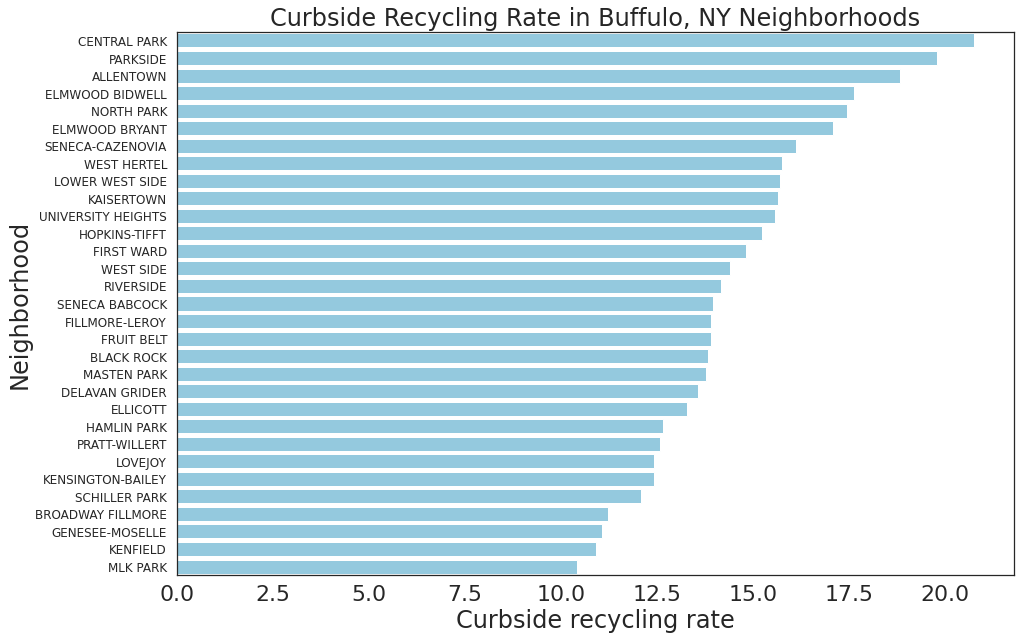

In [18]:
# rank neighborhoods by curbside recycling rates, highest to lowest
plt.figure(figsize=(15, 10))
neighborhood_rate = sns.barplot (
    y = 'Neighborhood',
    x = 'Curbside recycling rate',
    data = combMetrics,
    order = combMetrics.sort_values('Curbside recycling rate', ascending = False).Neighborhood,
    color = "skyblue"
)
neighborhood_rate.set_title('Curbside Recycling Rate in Buffulo, NY Neighborhoods')
neighborhood_rate.set_yticklabels(neighborhood_rate.get_yticklabels(), fontsize=12)
plt.show()

The above graph displays all of the curbside recycling rates grouped by each neighborhood in Buffalo, NY. According to the graph, the 5 neighborhoods with the highest recycling rates are Central Park, Parkside, Allentwon, Elmwood Bidwell, and North park. The 5 neighborhoods with the least recycle rates are MLK Park, Kenfield, Genesee-miselle, Broadway Fillmore, and Schiller Park.

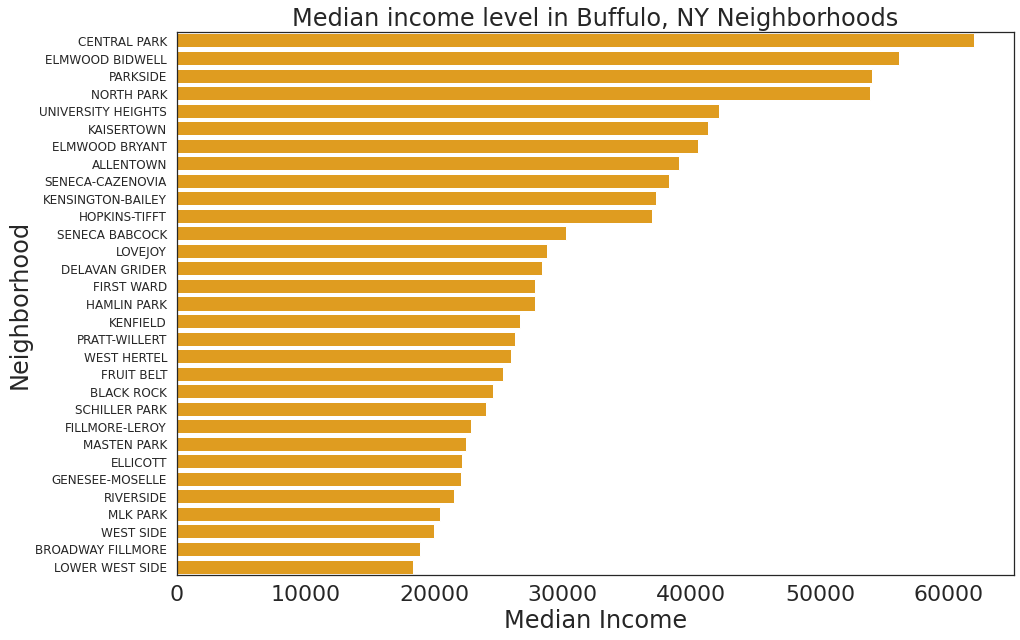

In [19]:
# rank neighborhoods by curbside income level, highest to lowest
plt.figure(figsize=(15, 10))
neighborhood_income = sns.barplot (
    y = 'Neighborhood',
    x = 'Median Income',
    data = combMetrics,
    order = combMetrics.sort_values('Median Income', ascending = False).Neighborhood,
    color = "orange"
)
neighborhood_income.set_title('Median income level in Buffulo, NY Neighborhoods')
neighborhood_income.set_yticklabels(neighborhood_income.get_yticklabels(), fontsize=12)
plt.show()

This graph displays the household median income grouped by each neighborhood in Buffalo, NY. If we look at the neighborhoods with the top incomes among all, we will notice that the 4 most wealthy neighborhoods are also among the top-five in terms of curbside recycling rate (Central Park, Elmwood Bidwell, Parkside, North Park). Now we turn to the least wealthy neighborhoods at the bottom of the graph, among the 6 neighborhoods with the lowest income, 3 of them are also among the bottom-five in the curbside recycling rate barplot (Broadway Fillmore, MLK Park, Genesee-moselle.

This discovery seems to support our hypothesis. To observe the relationships between financial factors and curbside recycling rates more indepth, we will create scattorplots to better visualize them.

## b) Relationship

We are looking into three financial factors among the neighborhoods: median income level, employment rate, and poverty rate. These three variables depict the economic status of the neighborhoods from three different angles, so if we can find considerable relationship and correlation in all three aspects, that would be a strong support to our hypothesis.

First we want to test the relationships. Is there a relationship between financial factors and curbside recycling rate? If so, what does the relationship look like?

### Median Income

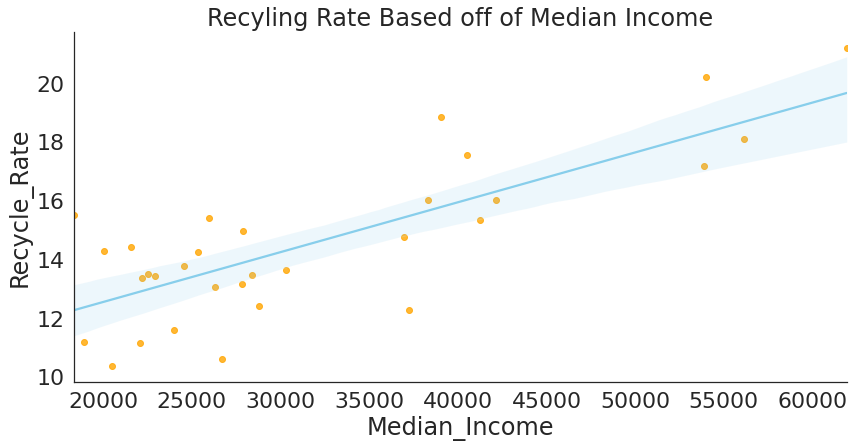

In [20]:
# median income vs recycle rate
data_1 = combMetrics[['Curbside recycling rate', 'Median Income' ]]
data_1.columns = ['Recycle_Rate', 'Median_Income']

sns.lmplot (
    data = data_1,
    x = 'Median_Income',
    y = 'Recycle_Rate',
    scatter_kws ={'color': 'orange'},
    line_kws={'color': 'skyblue'},
    fit_reg = True,
    height=6, aspect=2, x_jitter=.5, y_jitter=.5
)
ax = plt.gca()
ax.set_title("Recyling Rate Based off of Median Income")
plt.show()

This scatterplot shows the relationship between the Median Income vs the Curbside Recycling Rate of neighborhoods in Buffalo. The best fitting linear regrassion suggests a likely relationship between curbside recycling rate and income level. We see that the line has a positive slope, indicating a positive relationship, that is higher income neighborhoods practice better curbside recycling.

### Employment Rate

Text(0.5, 1.0, 'Recyling Rate Based off of Employment Rate')

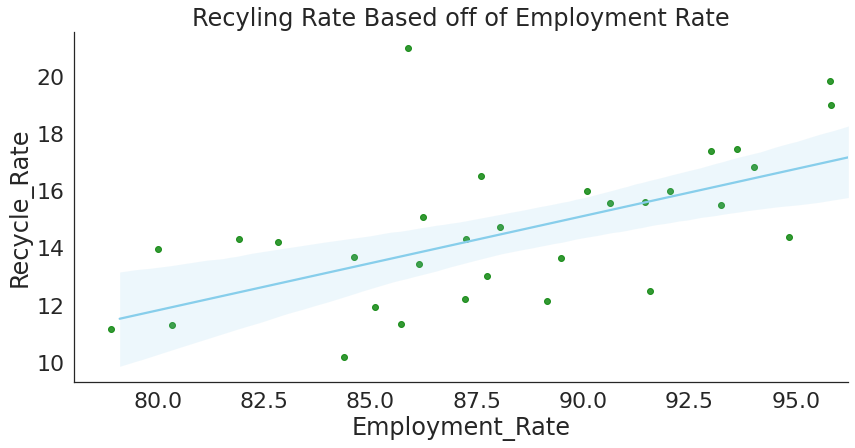

In [21]:
# employment rate vs recycle rate
data_emp = combMetrics[['Curbside recycling rate', 'Employment Rate']]
data_emp.columns = [ 'Recycle_Rate', 'Employment_Rate']

sns.lmplot (
    data = data_emp,
    x = 'Employment_Rate',
    y = 'Recycle_Rate',
    scatter_kws ={'color': 'green'},
    line_kws={'color': 'skyblue'},
    fit_reg = True,
    height=6, aspect=2, x_jitter=.5, y_jitter=.5
)
ax = plt.gca()
ax.set_title("Recyling Rate Based off of Employment Rate")

Employment Rate vs Curbside Recycling Rate plot also displays a positive slope, similar to the income factor above. The linear regression line here goes from ~12% to ~18%, which is slightly flatter compared to the ~12% to ~20% regression line in the graph above. At the same time, more datapoints seem to lie far from the best fitting line. One neighborhood with middle level of employment rate even holds the highest curbside recycling rate, as shown by the outlying datapoint in the middle top. These suggest that the relationship between curbside recycling rate and employment rate might be weaker than the one with income level.

### Poverty Rate

Text(0.5, 1.0, 'Recyling Rate Based off of Poverty Rate')

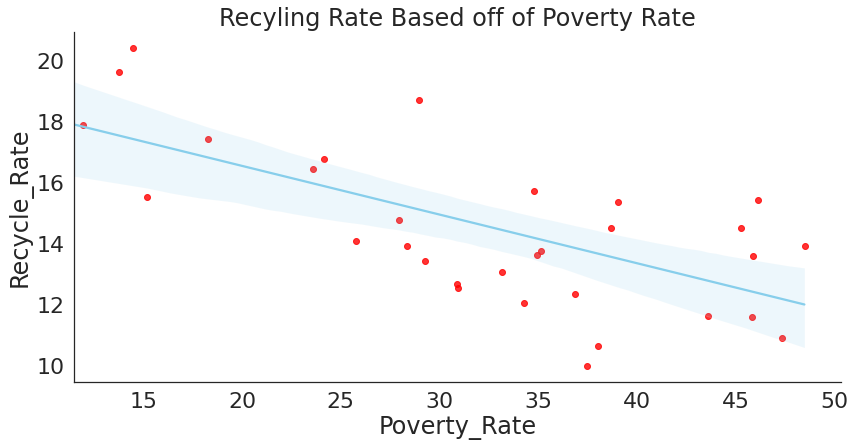

In [22]:
# proverty rate vs recycle rate
data_pov = combMetrics[['Curbside recycling rate', 'Poverty Rate']]
data_pov.columns = [ 'Recycle_Rate', 'Poverty_Rate']

sns.lmplot (
    data = data_pov,
    x = 'Poverty_Rate',
    y = 'Recycle_Rate',
    scatter_kws ={'color': 'red'},
    line_kws={'color': 'skyblue'},
    fit_reg = True,
    height=6, aspect=2, x_jitter=.5, y_jitter=.5
)
ax = plt.gca()
ax.set_title("Recyling Rate Based off of Poverty Rate")

This scatterplot shows the relationship between Poverty Rate and Curbside Recycling Rate of neighborhoods in Buffalo. As shown by the linear regression here, as poverty rate increases from 10% to 50%, curbside recycling rate drops by approximately 7%. The negative slope indicates a negative relationship, that is as poverty rate in a neighborhood increases, curbside recycling rate decreases. If such a decrease continues on for even higher proverty rate, then neighborhoods with 100% proverty rate might almost not do recycle.

## c) Correlation

Now that we see there is very likely a relationship between financial level and curbside recycling rate, we also want to know how strong the correlation is.

Before we analysis the correlation between financial factors vs curbside recycling rate, let's first check the ditribution of our data.

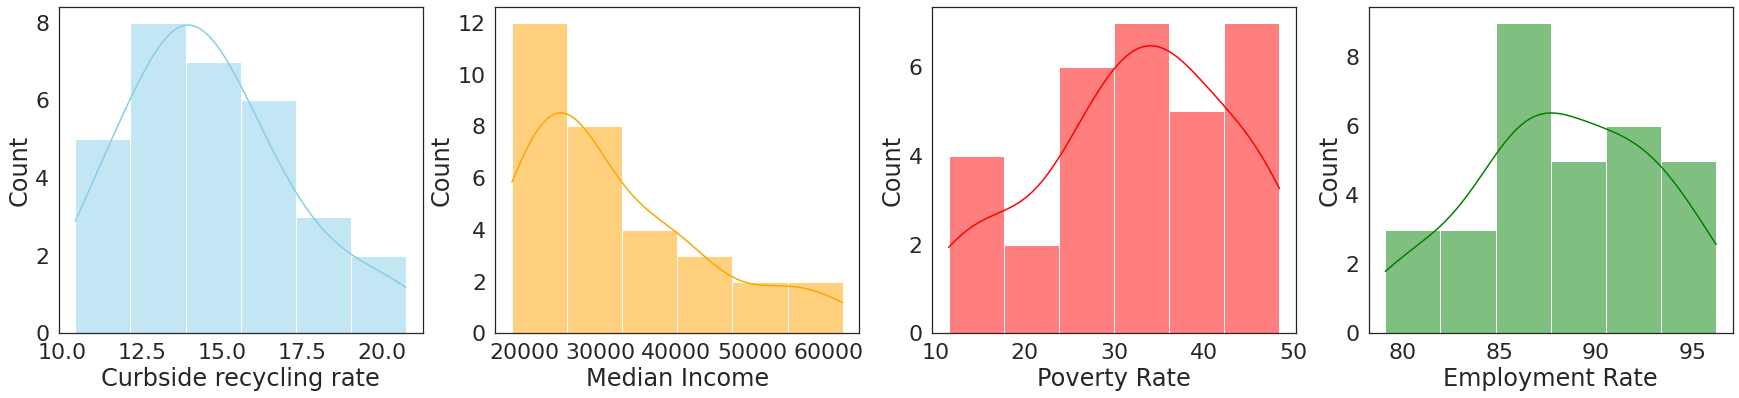

In [23]:
# histogram to see the distribution of our data
fig, axs = plt.subplots(1, 4, figsize=(30, 6))
sns.histplot(data=combMetrics, x="Curbside recycling rate", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=combMetrics, x="Median Income", kde=True, color="orange", ax=axs[1])
sns.histplot(data=combMetrics, x="Poverty Rate", kde=True, color="red", ax=axs[2])
sns.histplot(data=combMetrics, x="Employment Rate", kde=True, color="green", ax=axs[3])
plt.show()

The histograms above show the distribution of our data on curbside recycling rate and the three financial factors that we are looking into. We notice that the data on curbside recycling rate, proverty rate, and employment rate are only slightly skewed, but the data on median income is highly skewed to the right. Therefore, we will include a Spearman's correlation test besides the normal Pearson's correlation when checking the correlation of median income vs. curbside recycling rate.

### Median Income

The following are the Pearson's correlation, Spearman's correlation, and OLS results based on the relationship between Median Income and Curbside Recycling Rate.

In [24]:
# Pearson's r of median income vs recycle rate
combMetrics['Median Income'].corr(combMetrics['Curbside recycling rate'])

0.7887587803414294

In [25]:
# Spearman's rho of median income vs recycle rate
combMetrics['Median Income'].corr(combMetrics['Curbside recycling rate'], method='spearman')

0.6178665179063303

In [26]:
# OLS table of median income vs recycle rate
data_income = combMetrics[['Median Income', 'Curbside recycling rate']]
data_income.columns = ['Income', 'Recycle']
outcome, predictors = patsy.dmatrices('Recycle ~ Income', data_income)
mod_log = sm.OLS (outcome, predictors)
fit_res = mod_log.fit()
print (fit_res.summary())

                            OLS Regression Results                            
Dep. Variable:                Recycle   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     47.75
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           1.36e-07
Time:                        23:48:44   Log-Likelihood:                -57.631
No. Observations:                  31   AIC:                             119.3
Df Residuals:                      29   BIC:                             122.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1512      0.833     10.983      0.0

Pearson's correlation states that there is a very strong correlation of almost +0.8 between Curbside Recycling Rate and Median Income. But because the data of Median Income is highly skewed, we also want to double check with the Spearman correlation. The Spearman correlation also shows at least a moderate correlation of +0.6. Also as seen in the OLS table, the p-value is smaller than 0.01, which means it is very unlikely to get our result by chance alone, leading us to reject the null hypothesis. So we can conclude that there is a significant correlation between Curbside Recycling Rate and Median Income.

### Employment Rate

In [27]:
# Pearson's r of employment rate vs recycle rate
combMetrics['Employment Rate'].corr(combMetrics['Curbside recycling rate'])

0.5975470693488579

In [28]:
# OLS table of employment rate vs recycle rate
data_emp = combMetrics[['Employment Rate', 'Curbside recycling rate']]
data_emp.columns = ['Employment', 'Recycle']
outcome, predictors = patsy.dmatrices('Recycle ~ Employment', data_emp)
mod_log = sm.OLS (outcome, predictors)
fit_res = mod_log.fit()
print (fit_res.summary())

                            OLS Regression Results                            
Dep. Variable:                Recycle   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     16.11
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           0.000386
Time:                        23:48:45   Log-Likelihood:                -65.870
No. Observations:                  31   AIC:                             135.7
Df Residuals:                      29   BIC:                             138.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5521      7.262     -2.004      0.0

According to the Pearson's correlation, there is about a moderate correlation of about +0.6 between Employment Rate of the neighborhoods and their Curbside Recycling Rate. Again, the p-value is smaller than 0.01, so we can reject the null hypothesis.

### Poverty Rate

In [29]:
# Pearson's r of proverty rate vs recycle rate
combMetrics['Poverty Rate'].corr(combMetrics['Curbside recycling rate'])

-0.6562128487081829

In [30]:
# OLS table of proverty rate vs recycle rate
data_pov = combMetrics[['Poverty Rate', 'Curbside recycling rate']]
data_pov.columns = ['Poverty', 'Recycle']
outcome, predictors = patsy.dmatrices('Poverty ~ Recycle', data_pov)
mod_log = sm.OLS (outcome, predictors)
fit_res = mod_log.fit()
print (fit_res.summary())

                            OLS Regression Results                            
Dep. Variable:                Poverty   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     21.93
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           6.11e-05
Time:                        23:48:45   Log-Likelihood:                -107.86
No. Observations:                  31   AIC:                             219.7
Df Residuals:                      29   BIC:                             222.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.8271      8.523      8.428      0.0

There is about a strong correlation of about -0.65 between Poverty Rate of the neighborhoods and their Curbside Recycling Rate. The correlation value is negative, meaning their is a negative relationship, just as we discovered in the relationship section above. According to the OLS table, the p-value is smaller than 0.01, leading us to reject the null hypothesis.

In conclusion, all 3 financial factors we have display at least a moderate correlation with curbside recycling rate in Buffalo. Generally speaking, the higher income level and employment rate a neighborhood has, or the lower poverty rate it suffers, then it is more likely that it owns higher curbside recycling rate. This observation strongly support our hypothesis that, among neighborhoods in Buffalo, NY, there is a correlation between curbside recycling rates and financial factors, and wealthier neighborhoods practice recycling better.

Comparing between the correlation of the 3 financial factors, we can see that poverty rate is the most correlated to curbside recycling rate. Income level displays a strong correlation , but since the data for it is highly skewed, research needs to be done with more normalized datasets to be sure. Employment rate seems to predict curbside recycling rate less well compared to the other two factors, but there is still a moderate correlation.

## d) Surprising Finding About Gender

What other factors might influence, or at least correlate to curbside recycling rate? As we played with different variables in the dataset and tried to answer this question, we found something unexpected about the relationship between Gender Ratio and Curbside Recycling Rate. Gender ratio in a neighborhood seems to effect its curbside recycling rate.

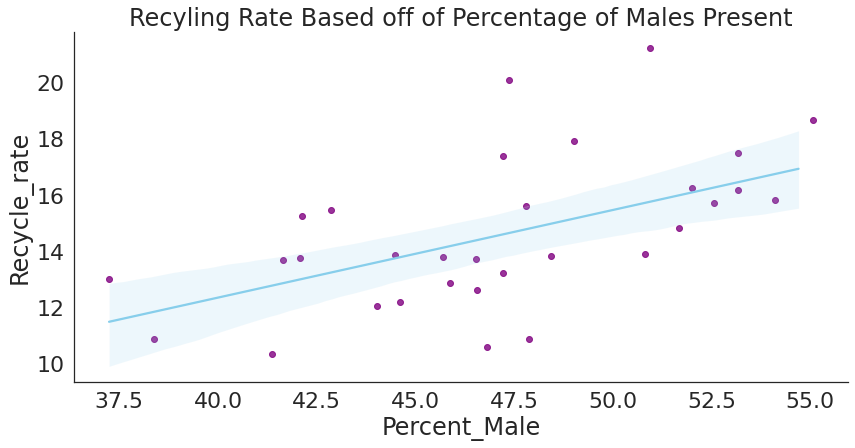

In [31]:
# gender (male ratio) vs recycle rate
data_male = combMetrics[['Curbside recycling rate', 'Percent Male']]
data_male.columns = ['Recycle_rate', 'Percent_Male' ]

sns.lmplot (
    data = data_male,
    x = 'Percent_Male',
    y = 'Recycle_rate',
    scatter_kws ={'color': 'purple'},
    line_kws={'color': 'skyblue'},
    fit_reg = True,
    height=6, aspect=2, x_jitter=.5, y_jitter=.5
)
ax = plt.gca()
ax.set_title("Recyling Rate Based off of Percentage of Males Present")
plt.show()

In [32]:
# OLS table of gender (male) vs curbside recycling rate
outcome, predictors = patsy.dmatrices('Recycle_rate ~ Percent_Male', data_male)
mod_log = sm.OLS (outcome, predictors)
fit_res = mod_log.fit()
print (fit_res.summary())

                            OLS Regression Results                            
Dep. Variable:           Recycle_rate   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     12.36
Date:                Fri, 10 Dec 2021   Prob (F-statistic):            0.00146
Time:                        23:48:45   Log-Likelihood:                -67.213
No. Observations:                  31   AIC:                             138.4
Df Residuals:                      29   BIC:                             141.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1063      4.188     -0.025   

Why would gender effect recycling rate? In fact, even if we are told that curbside recycling rate differs significantly by gender, from the widely held stereotype of male and female, we are likely to expect that neighborhoods with more male residents would care less about cleaning and recycling, and thus have lower curbside recycling rate. Yet surprisingly, our data seems to tell the opposite. As seen in the scatterplot above, neighborhoods in Buffalo with higher percentage of male residents actually perform better curbside recycling on average. The p-value of 0.01 further indicates that this finding is statistically significant.

We have thought of two possible explanations to this phenomenon:
1. Maybe male residents purchase more recyclable containers, such as boxes of beer and cans of soda. While female residents purchase less of those and reuse things when they can, so most of their garbbage are unrecyclable, such as food waste.
2. Income level might be a confounder here. As shown in the plot below, there is a slightly positive relationship between male ratio and median income of a neighborhood, that is neighborhoods with more male residents are also the wealthier ones. Since income level is strongly correlated with curbside recycling rate as we analyzed above, it could make sense that males who earn more are performing better recycling too.

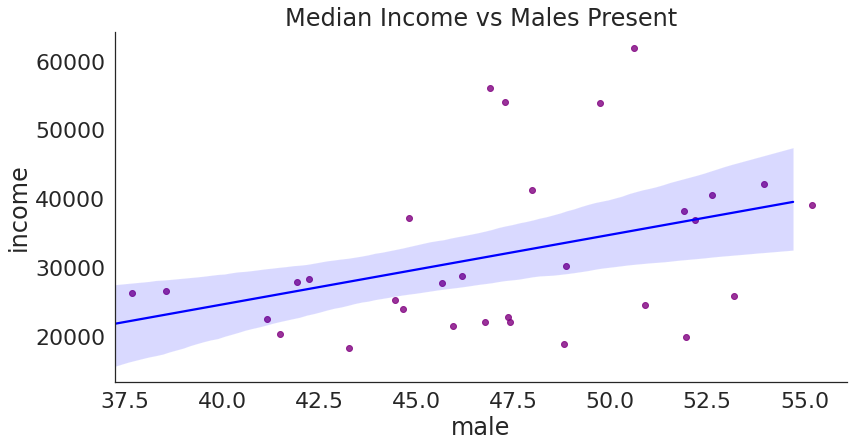

In [33]:
# graoh to support possible explanation 2 above
income_male = combMetrics[['Percent Male', 'Median Income']]
income_male.columns = ['male', 'income']
sns.lmplot (
    data = income_male,
    x = 'male',
    y = 'income',
    scatter_kws = {'color': 'purple'},
    line_kws = {'color': 'blue'},
    fit_reg = True,
    height=6, aspect=2, x_jitter=.5, y_jitter=.5
)
ax = plt.gca()
ax.set_title("Median Income vs Males Present")
plt.show()

# Ethics & Privacy

### Why did we choose the two datasets? 

This is the most ideal dataset we found for our research. It shows the rate of recycling grouped by income rates, unemployment rates, and poverty rates, along with some other factors such as gender, age, and ethnicity.

### How we made sure the community boundaries we had are consistent between the two datasets

We have found a map for the region with the most recent names for the neighborhoods, and we have matched the names on the combined dataset with the names on the map for consistency. However, since none of our group members are actually from the area, there are still possibilities that the neighborhood names are not accurate.

### Potential Bias in Our Research

Ethnicity bias: Since we are only making observations on one city, Buffalo NY, there might be potential bias on the percentage/composition of different racial backgrounds. The observations we have might be hard to make generalizations to the whole U.S. population.

### How did we handle the privacy/bias concerns

Since the datasets are on a public website and both of them use curbside recycling inside of the actual recycling rate, there are less privacy concerns to privacy issues. None of the datasets include personal information regarding residents in those neighborhoods, so there’s no concern of leaking personal information in our project.

# Conclusion & Discussion

For our project, we started by merging and renaming the datasets we found. To ensure the names of each neighborhood is accurate, we found a map with the latest names for each of the neighborhoods in Buffalo, NY. Then we used the combined dataset called comMetrics to make graphs showing the income and financial factors of each neighborhood. Through the graphs, we realize there could be some relationships between financial factors and curbside recycling rates like what we stated in the null hypothesis. Therefore, we decided to make an OLS chart showing all the statistical aspects of our dataset.

Interestingly, the p-values for the three graphs: Recycling Rate Based Off of Median Income, Recycling Rate Based off of Employment Rate, and Recycling Rate Base off of Poverty Rate are all 0.000, which means there is a strong statistical significance between these values. For curbside recycling rate and median income, the Pearson Correlation is 79%, which shows there is a strong positive correlation between the median income and curbside recycling rate per neighborhood. For curbside recycling rate and employment rate, there is a Pearson Correlation of 60%, which shows there is a positive correlation between these two variables in Buffalo, NY. Then, for curbside recycling rate and poverty rate, there is a Pearson correlation of -66%, which shows a negative correlation between the two variables. This means that as the poverty rate increases in the neighborhood, the curbside recycling rate is going to drop.

Since we are using null hypothesis testing here for our research, at the 5% significance level, since the p-values are all equal to 0.000 in our research, it is sufficient enough to reject the null hypothesis. Therefore, we are confident to say there exists a correlation between curbside recycling rates and financial factors in each neighborhood of Buffalo, NY.

We are aware that there are some other variables which might contribute to the curbside recycling levels in neighborhoods of Buffalo, NY., but for our research we are only going to focus on the relationship between financial factors and curbside recycling.

# Team Contributions

- Athena Hao: Helped with writing the overview, background, and prior work. Also helped with writing the ethics & privacy, and conclusion.
- Allison Ngo: Helped with data cleaning, such as merging the two datasets and renaming them.
- Karina Sanchez: Helped with EDA, such as making the ols chart and the plots.
- Lingye Zhuang: Helped with both data cleaning and EDA, such as writing the analysis for each graph. 